In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme(color_codes=True)

In [100]:
df = pd.read_csv('final_happiness.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,Regional_indicator,Perceptions_of_happiness,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dollar_price
0,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,4.125534
1,North America and ANZ,7.183,10.796,0.940,73.900,0.914,0.159,0.442,4.527955
2,Western Europe,7.268,10.906,0.934,73.300,0.908,0.042,0.481,3.882630
3,Western Europe,6.834,10.823,0.906,72.199,0.783,-0.153,0.646,4.624897
4,Latin America and Caribbean,6.330,9.577,0.882,66.601,0.804,-0.071,0.756,5.101568
5,North America and ANZ,7.103,10.776,0.926,73.800,0.915,0.089,0.415,4.655697
6,Latin America and Caribbean,6.172,10.071,0.882,70.000,0.742,-0.044,0.830,3.844096
7,East Asia,5.339,9.673,0.811,69.593,0.904,-0.146,0.755,2.917127
8,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841,3.243605
9,Latin America and Caribbean,7.069,9.880,0.891,71.400,0.934,-0.126,0.809,4.000035


# Feature Engineering

In [101]:
def change_category(region):
    if region == 'Western Europe' or region == 'Central and Eastern Europe' or region == 'Commonwealth of Independent States':
        return 'Europe'
    if region == 'Middle East and North Africa' or region == 'East Asia' or region == 'South Asia' or region == 'Southeast Asia':
        return 'Asia'
    return region

In [140]:
df['Regional_indicator'] = list(map(change_category, df['Regional_indicator']))
df_categories = pd.get_dummies(df)
df_categories = df_categories.rename(columns={'Regional_indicator_Asia':'Asia','Regional_indicator_Europe':'Europe','Regional_indicator_Latin America and Caribbean':'Latin_America','Regional_indicator_North America and ANZ':'North_America'})
df_categories['Intercept'] = np.ones(50)
df_categories.head(5)


,Perceptions_of_happiness,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dollar_price,Asia,Europe,Latin_America,North_America,Intercept
0,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,4.125534,0,0,1,0,1.0
1,7.183,10.796,0.940,73.900,0.914,0.159,0.442,4.527955,0,0,0,1,1.0
2,7.268,10.906,0.934,73.300,0.908,0.042,0.481,3.882630,0,1,0,0,1.0
3,6.834,10.823,0.906,72.199,0.783,-0.153,0.646,4.624897,0,1,0,0,1.0
4,6.330,9.577,0.882,66.601,0.804,-0.071,0.756,5.101568,0,0,1,0,1.0


## Measure Collinearity

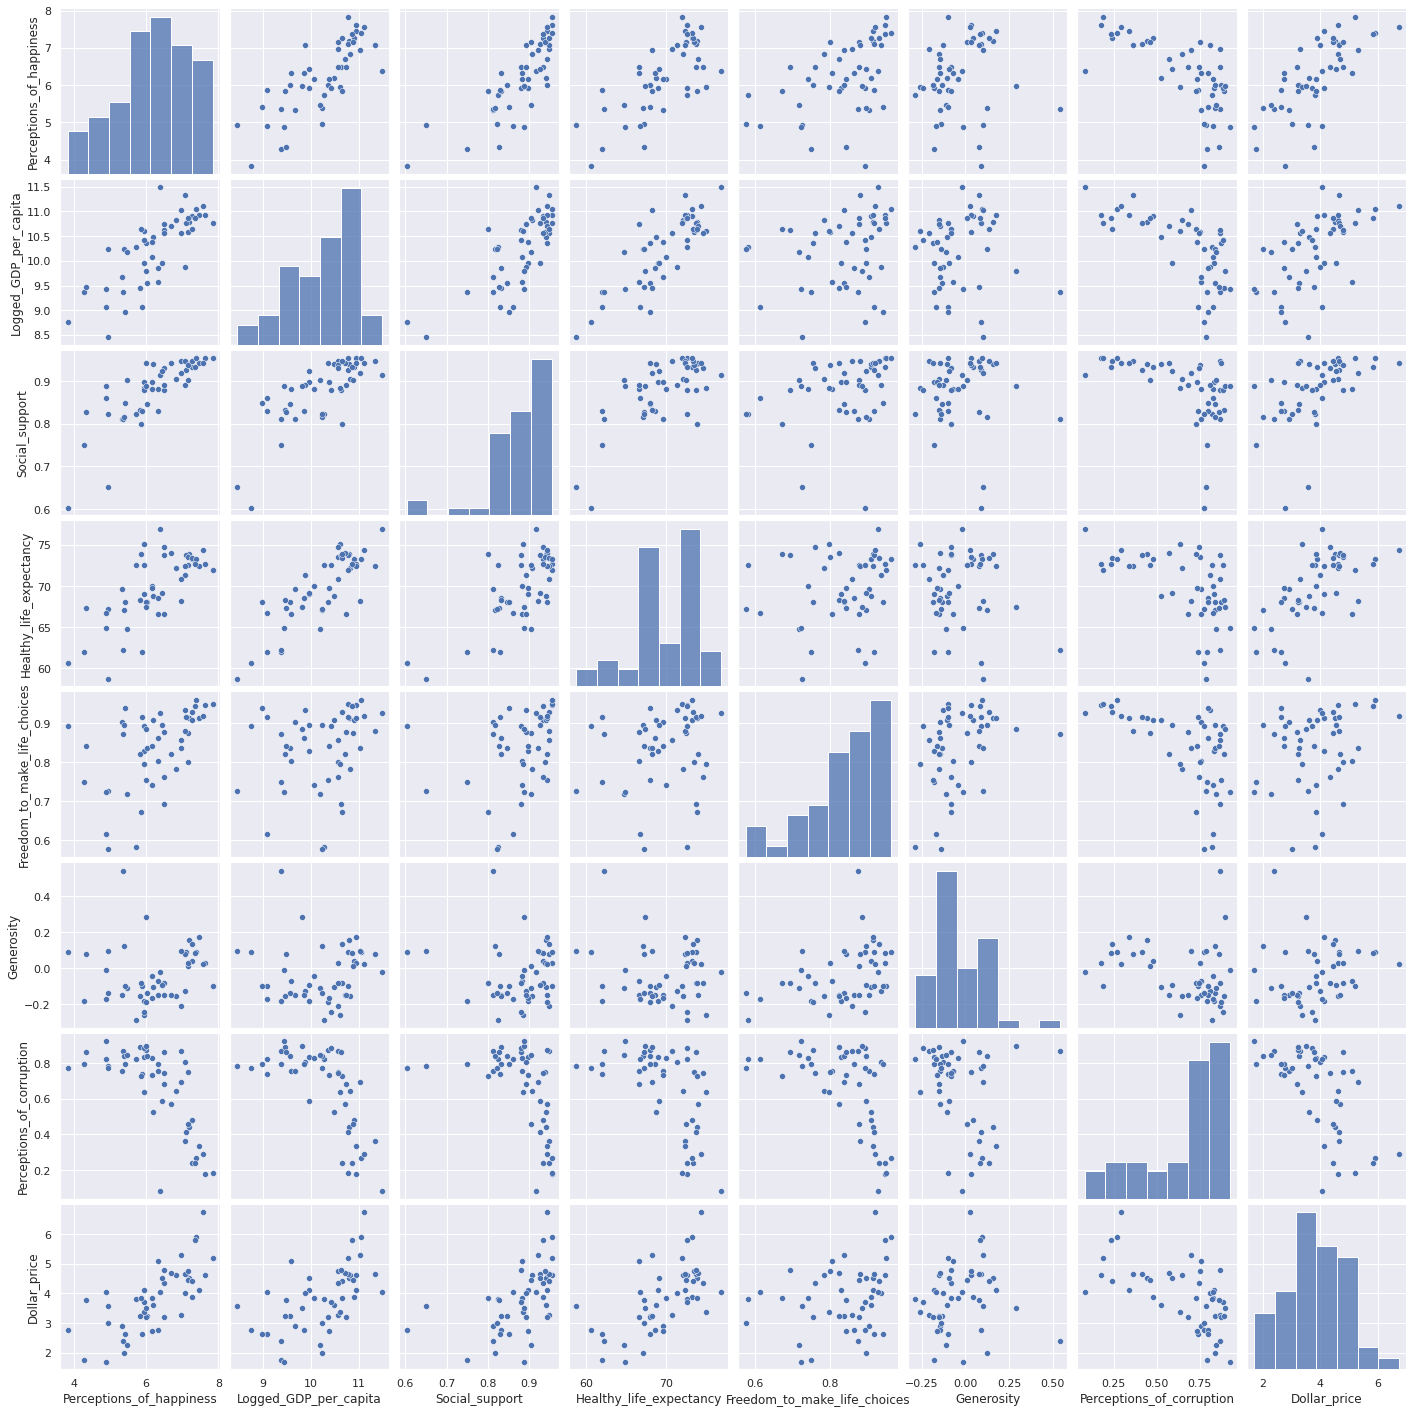

In [115]:
sns.pairplot(df)

<AxesSubplot:>

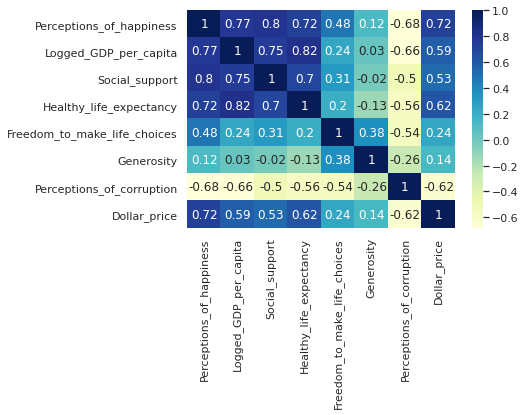

In [105]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")

## Initial VIF

In [220]:
vif_df = df_categories.drop(columns=['Perceptions_of_happiness'])
vif = pd.DataFrame()
vif["variables"] = vif_df.columns
#print(vif)
vif["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
print(vif)

                       variables       VIF
0          Logged_GDP_per_capita  5.972201
1                 Social_support  3.478019
2        Healthy_life_expectancy  4.078158
3   Freedom_to_make_life_choices  1.785210
4                     Generosity  1.638883
5      Perceptions_of_corruption  3.097564
6                   Dollar_price  2.446397
7                           Asia       inf
8                         Europe       inf
9                  Latin_America       inf
10                 North_America       inf
11                     Intercept  0.000000


/home/michael/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/michael/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


# Model Using All Predictors

<AxesSubplot:xlabel='Perceptions_of_happiness', ylabel='Regional_indicator'>

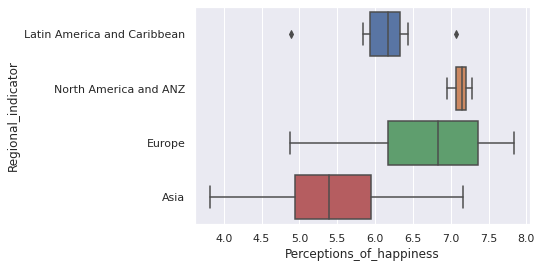

In [106]:
sns.boxplot(x='Perceptions_of_happiness',y='Regional_indicator',data=df)

In [145]:
import statsmodels.formula.api as smf
#model = smf.ols('Perceptions_of_happiness ~ Healthy_life_expectancy + Social_support + Logged_GDP_per_capita + Regional_indicator + Freedom_to_make_life_choices + Generosity + Perceptions_of_corruption + Dollar_price', df)
model = smf.ols('Perceptions_of_happiness ~ Healthy_life_expectancy + Social_support + Logged_GDP_per_capita + Asia + Europe + Latin_America + North_America + Freedom_to_make_life_choices + Generosity + Perceptions_of_corruption + Dollar_price', df_categories)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.849
Model:                                  OLS   Adj. R-squared:                  0.810
Method:                       Least Squares   F-statistic:                     21.95
Date:                      Thu, 22 Jul 2021   Prob (F-statistic):           5.01e-13
Time:                              08:27:13   Log-Likelihood:                -20.593
No. Observations:                        50   AIC:                             63.19
Df Residuals:                            39   BIC:                             84.22
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.2034      1.456     -2.200      0.034      -6.148      -0.258
Healthy_life_expectancy          0.0080      0.029      0.277      0.784      -0.050       0.066
Social_support                   3.3116      1.514      2.188      0.035       0.250       6.373
Logged_GDP_per_capita            0.4044      0.203      1.989      0.054      -0.007       0.816
Asia                            -1.0422      0.363     -2.874      0.007      -1.776      -0.309
Europe                          -0.7749      0.394     -1.965      0.057      -1.573       0.023
Latin_America                   -0.6295      0.375     -1.680      0.101      -1.388       0.129
North_America                   -0.7569      0.435     -1.738      0.090      -1.637       0.124
Freedom_to_make_life_choices     2.2729      0.813      2.797      0.008       0.629       3.917
Generosity                       0.2123      0.495      0.429      0.670      -0.788       1.213
Perceptions_of_corruption       -0.1186      0.446     -0.266      0.792      -1.020       0.783
Dollar_price                     0.2185      0.086      2.542      0.015       0.045       0.392
==============================================================================
Omnibus:                        4.055   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.063
Skew:                          -0.415   Prob(JB):                        0.216
Kurtosis:                       3.883   Cond. No.                     1.26e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Remove Corruption Variable

In [146]:
model2 = smf.ols('Perceptions_of_happiness ~ Healthy_life_expectancy + Social_support + Logged_GDP_per_capita + Europe + Asia + North_America + Latin_America + Freedom_to_make_life_choices + Generosity + Dollar_price', df_categories)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.849
Model:                                  OLS   Adj. R-squared:                  0.815
Method:                       Least Squares   F-statistic:                     24.97
Date:                      Thu, 22 Jul 2021   Prob (F-statistic):           9.97e-14
Time:                              08:29:28   Log-Likelihood:                -20.638
No. Observations:                        50   AIC:                             61.28
Df Residuals:                            40   BIC:                             80.40
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.4638      1.066     -3.250      0.002      -5.618      -1.310
Healthy_life_expectancy          0.0079      0.029      0.276      0.784      -0.050       0.066
Social_support                   3.2553      1.481      2.198      0.034       0.262       6.249
Logged_GDP_per_capita            0.4221      0.190      2.223      0.032       0.038       0.806
Europe                          -0.8383      0.311     -2.700      0.010      -1.466      -0.211
Asia                            -1.1064      0.267     -4.137      0.000      -1.647      -0.566
North_America                   -0.8192      0.363     -2.259      0.029      -1.552      -0.086
Latin_America                   -0.6998      0.263     -2.665      0.011      -1.231      -0.169
Freedom_to_make_life_choices     2.3799      0.698      3.410      0.001       0.969       3.790
Generosity                       0.2179      0.488      0.446      0.658      -0.769       1.205
Dollar_price                     0.2273      0.078      2.898      0.006       0.069       0.386
==============================================================================
Omnibus:                        4.337   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.417
Skew:                          -0.418   Prob(JB):                        0.181
Kurtosis:                       3.970   Cond. No.                     1.89e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.04e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Remove Life Expectancy Variable

In [151]:
model3 = smf.ols('Perceptions_of_happiness ~ Social_support + Logged_GDP_per_capita + Europe + Asia + Latin_America + North_America + Freedom_to_make_life_choices + Generosity + Dollar_price', df_categories)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.849
Model:                                  OLS   Adj. R-squared:                  0.819
Method:                       Least Squares   F-statistic:                     28.72
Date:                      Thu, 22 Jul 2021   Prob (F-statistic):           1.85e-14
Time:                              08:36:28   Log-Likelihood:                -20.686
No. Observations:                        50   AIC:                             59.37
Df Residuals:                            41   BIC:                             76.58
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.3409      0.957     -3.490      0.001      -5.274      -1.407
Social_support                   3.3188      1.447      2.294      0.027       0.397       6.240
Logged_GDP_per_capita            0.4520      0.154      2.929      0.006       0.140       0.764
Europe                          -0.8126      0.293     -2.774      0.008      -1.404      -0.221
Asia                            -1.0726      0.235     -4.564      0.000      -1.547      -0.598
Latin_America                   -0.6662      0.230     -2.897      0.006      -1.131      -0.202
North_America                   -0.7895      0.342     -2.306      0.026      -1.481      -0.098
Freedom_to_make_life_choices     2.3881      0.689      3.464      0.001       0.996       3.780
Generosity                       0.1762      0.459      0.384      0.703      -0.751       1.104
Dollar_price                     0.2343      0.073      3.190      0.003       0.086       0.383
==============================================================================
Omnibus:                        3.982   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                2.962
Skew:                          -0.421   Prob(JB):                        0.227
Kurtosis:                       3.844   Cond. No.                     6.72e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Remove Generosity

In [224]:
model4 = smf.ols('Perceptions_of_happiness ~ Social_support + Logged_GDP_per_capita + Europe + Asia + Latin_America + North_America + Freedom_to_make_life_choices  + Dollar_price', df_categories)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.848
Model:                                  OLS   Adj. R-squared:                  0.823
Method:                       Least Squares   F-statistic:                     33.49
Date:                      Fri, 23 Jul 2021   Prob (F-statistic):           3.28e-15
Time:                              19:21:08   Log-Likelihood:                -20.775
No. Observations:                        50   AIC:                             57.55
Df Residuals:                            42   BIC:                             72.85
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.3436      0.948     -3.528      0.001      -5.256      -1.431
Social_support                   3.3114      1.432      2.313      0.026       0.422       6.201
Logged_GDP_per_capita            0.4430      0.151      2.934      0.005       0.138       0.748
Europe                          -0.8187      0.290     -2.828      0.007      -1.403      -0.234
Asia                            -1.0672      0.232     -4.596      0.000      -1.536      -0.599
Latin_America                   -0.6876      0.221     -3.114      0.003      -1.133      -0.242
North_America                   -0.7701      0.335     -2.297      0.027      -1.447      -0.094
Freedom_to_make_life_choices     2.4766      0.643      3.852      0.000       1.179       3.774
Dollar_price                     0.2403      0.071      3.383      0.002       0.097       0.384
==============================================================================
Omnibus:                        3.940   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.888
Skew:                          -0.435   Prob(JB):                        0.236
Kurtosis:                       3.794   Cond. No.                     2.93e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.16e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Analyzing the Model

In [235]:
df_results = pd.DataFrame()
df_results['Actual'] = df_categories['Perceptions_of_happiness']
df_results['Predicted'] = model4.predict()
df_results.head()

,Actual,Predicted
0,5.929,6.397765
1,7.183,7.133509
2,7.268,6.943824
3,6.834,6.683111
4,6.330,6.349309


## VIF

In [223]:
vif_df = df_categories.drop(columns=['Perceptions_of_happiness', 'Perceptions_of_corruption', 'Generosity', 'Healthy_life_expectancy'])
vif = pd.DataFrame()
vif["variables"] = vif_df.columns
#print(vif)
vif["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
print(vif)


                      variables       VIF
0         Logged_GDP_per_capita  3.521457
1                Social_support  3.327201
2  Freedom_to_make_life_choices  1.194655
3                  Dollar_price  1.785743
4                          Asia       inf
5                        Europe       inf
6                 Latin_America       inf
7                 North_America       inf
8                     Intercept  0.000000


/home/michael/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/michael/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


## Residual Analysis

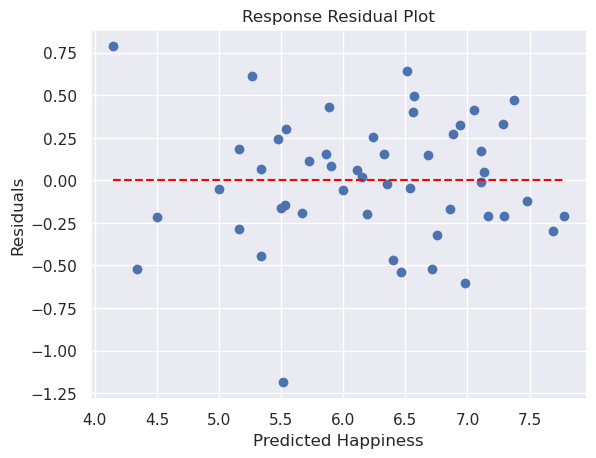

In [251]:
plt.scatter(df_results['Predicted'], model4.resid)
plt.plot([df_results['Predicted'].min(),df_results['Predicted'].max()],[0,0], '--',color = 'red')
plt.xlabel('Predicted Happiness')
plt.ylabel('Residuals')
plt.title('Response Residual Plot')
plt.grid(True)

Text(0.5, 1.0, 'Residual Histogram')

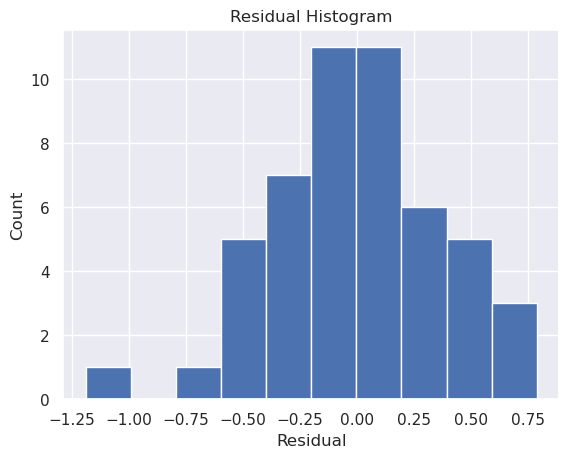

In [249]:
plt.hist(model4.resid)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residual Histogram')

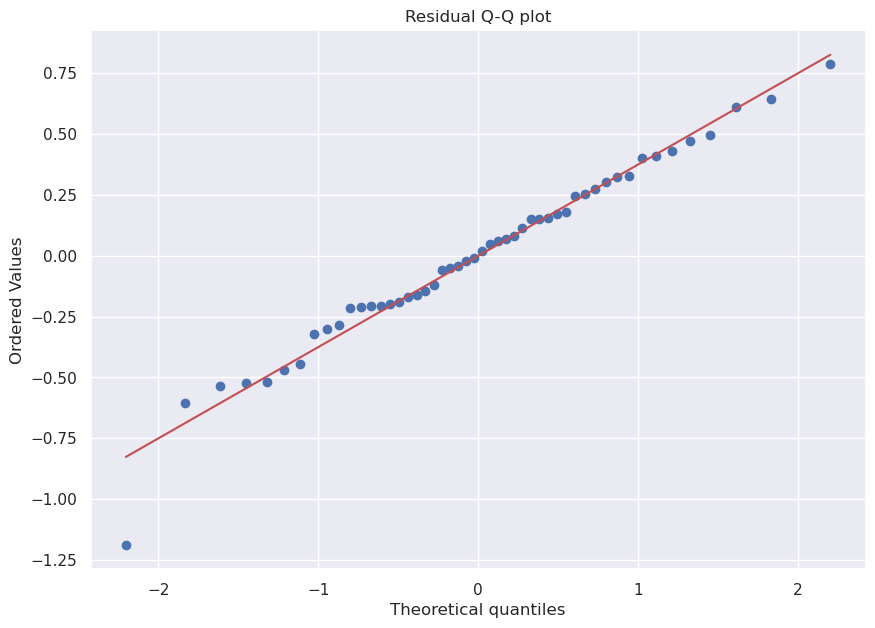

In [248]:
from scipy import stats
plt.figure(figsize=(10,7))
plt.grid(True)
res = stats.probplot(model4.resid, plot=plt)
plt.title('Residual Q-Q plot')
plt.show()

### Shapiro Test

In [281]:
from scipy import stats
stats.shapiro(model4.resid)

ShapiroResult(statistic=0.9799081087112427, pvalue=0.5480934381484985)

## Leverage and Influence 



Leverage vs. Studentized Residuals


/home/michael/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Studentized Residuals')

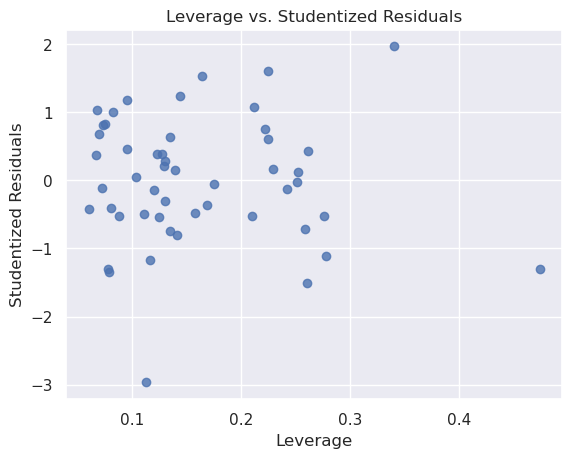

In [292]:
influence = model4.get_influence()
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, model4.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

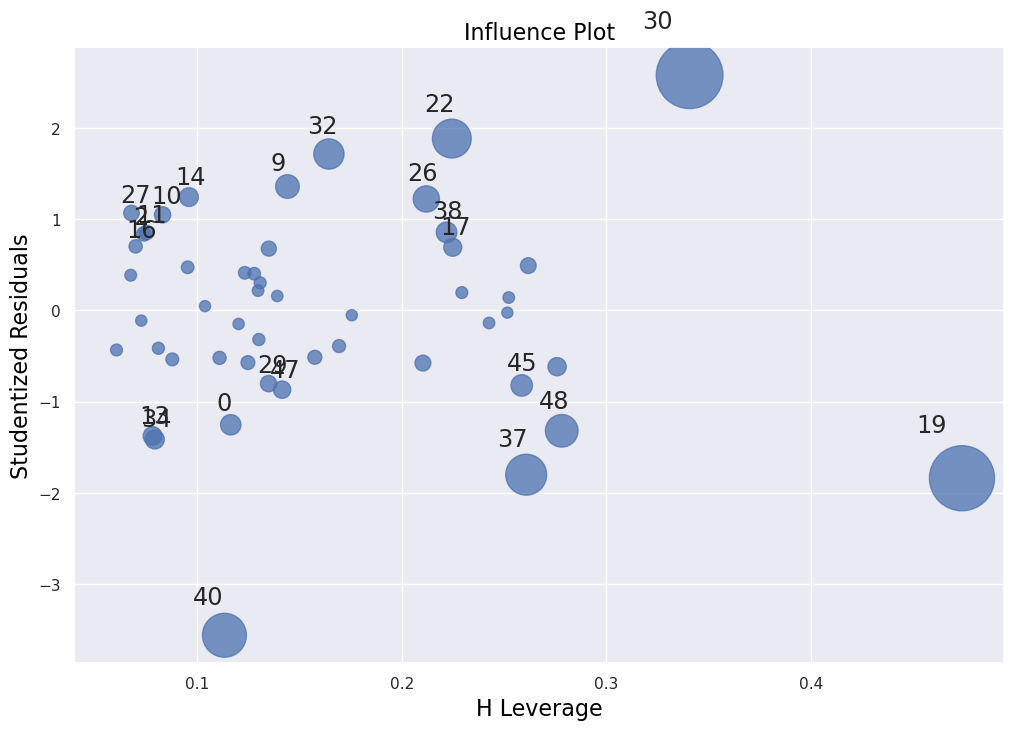

In [293]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model4, ax= ax, criterion="cooks", alpha = 0.5)

## Actual Vs Predicted Plot

Text(0.5, 1.0, 'Actual Vs Predicted')

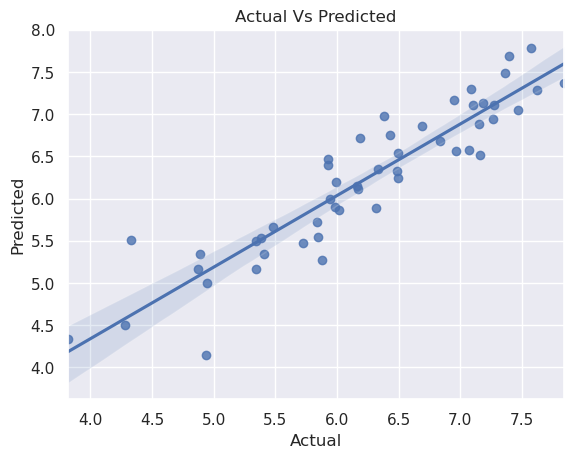

In [246]:
sns.regplot(x='Actual', y='Predicted', ci=95, data=df_results)
plt.title('Actual Vs Predicted')

## Garbage, ignore

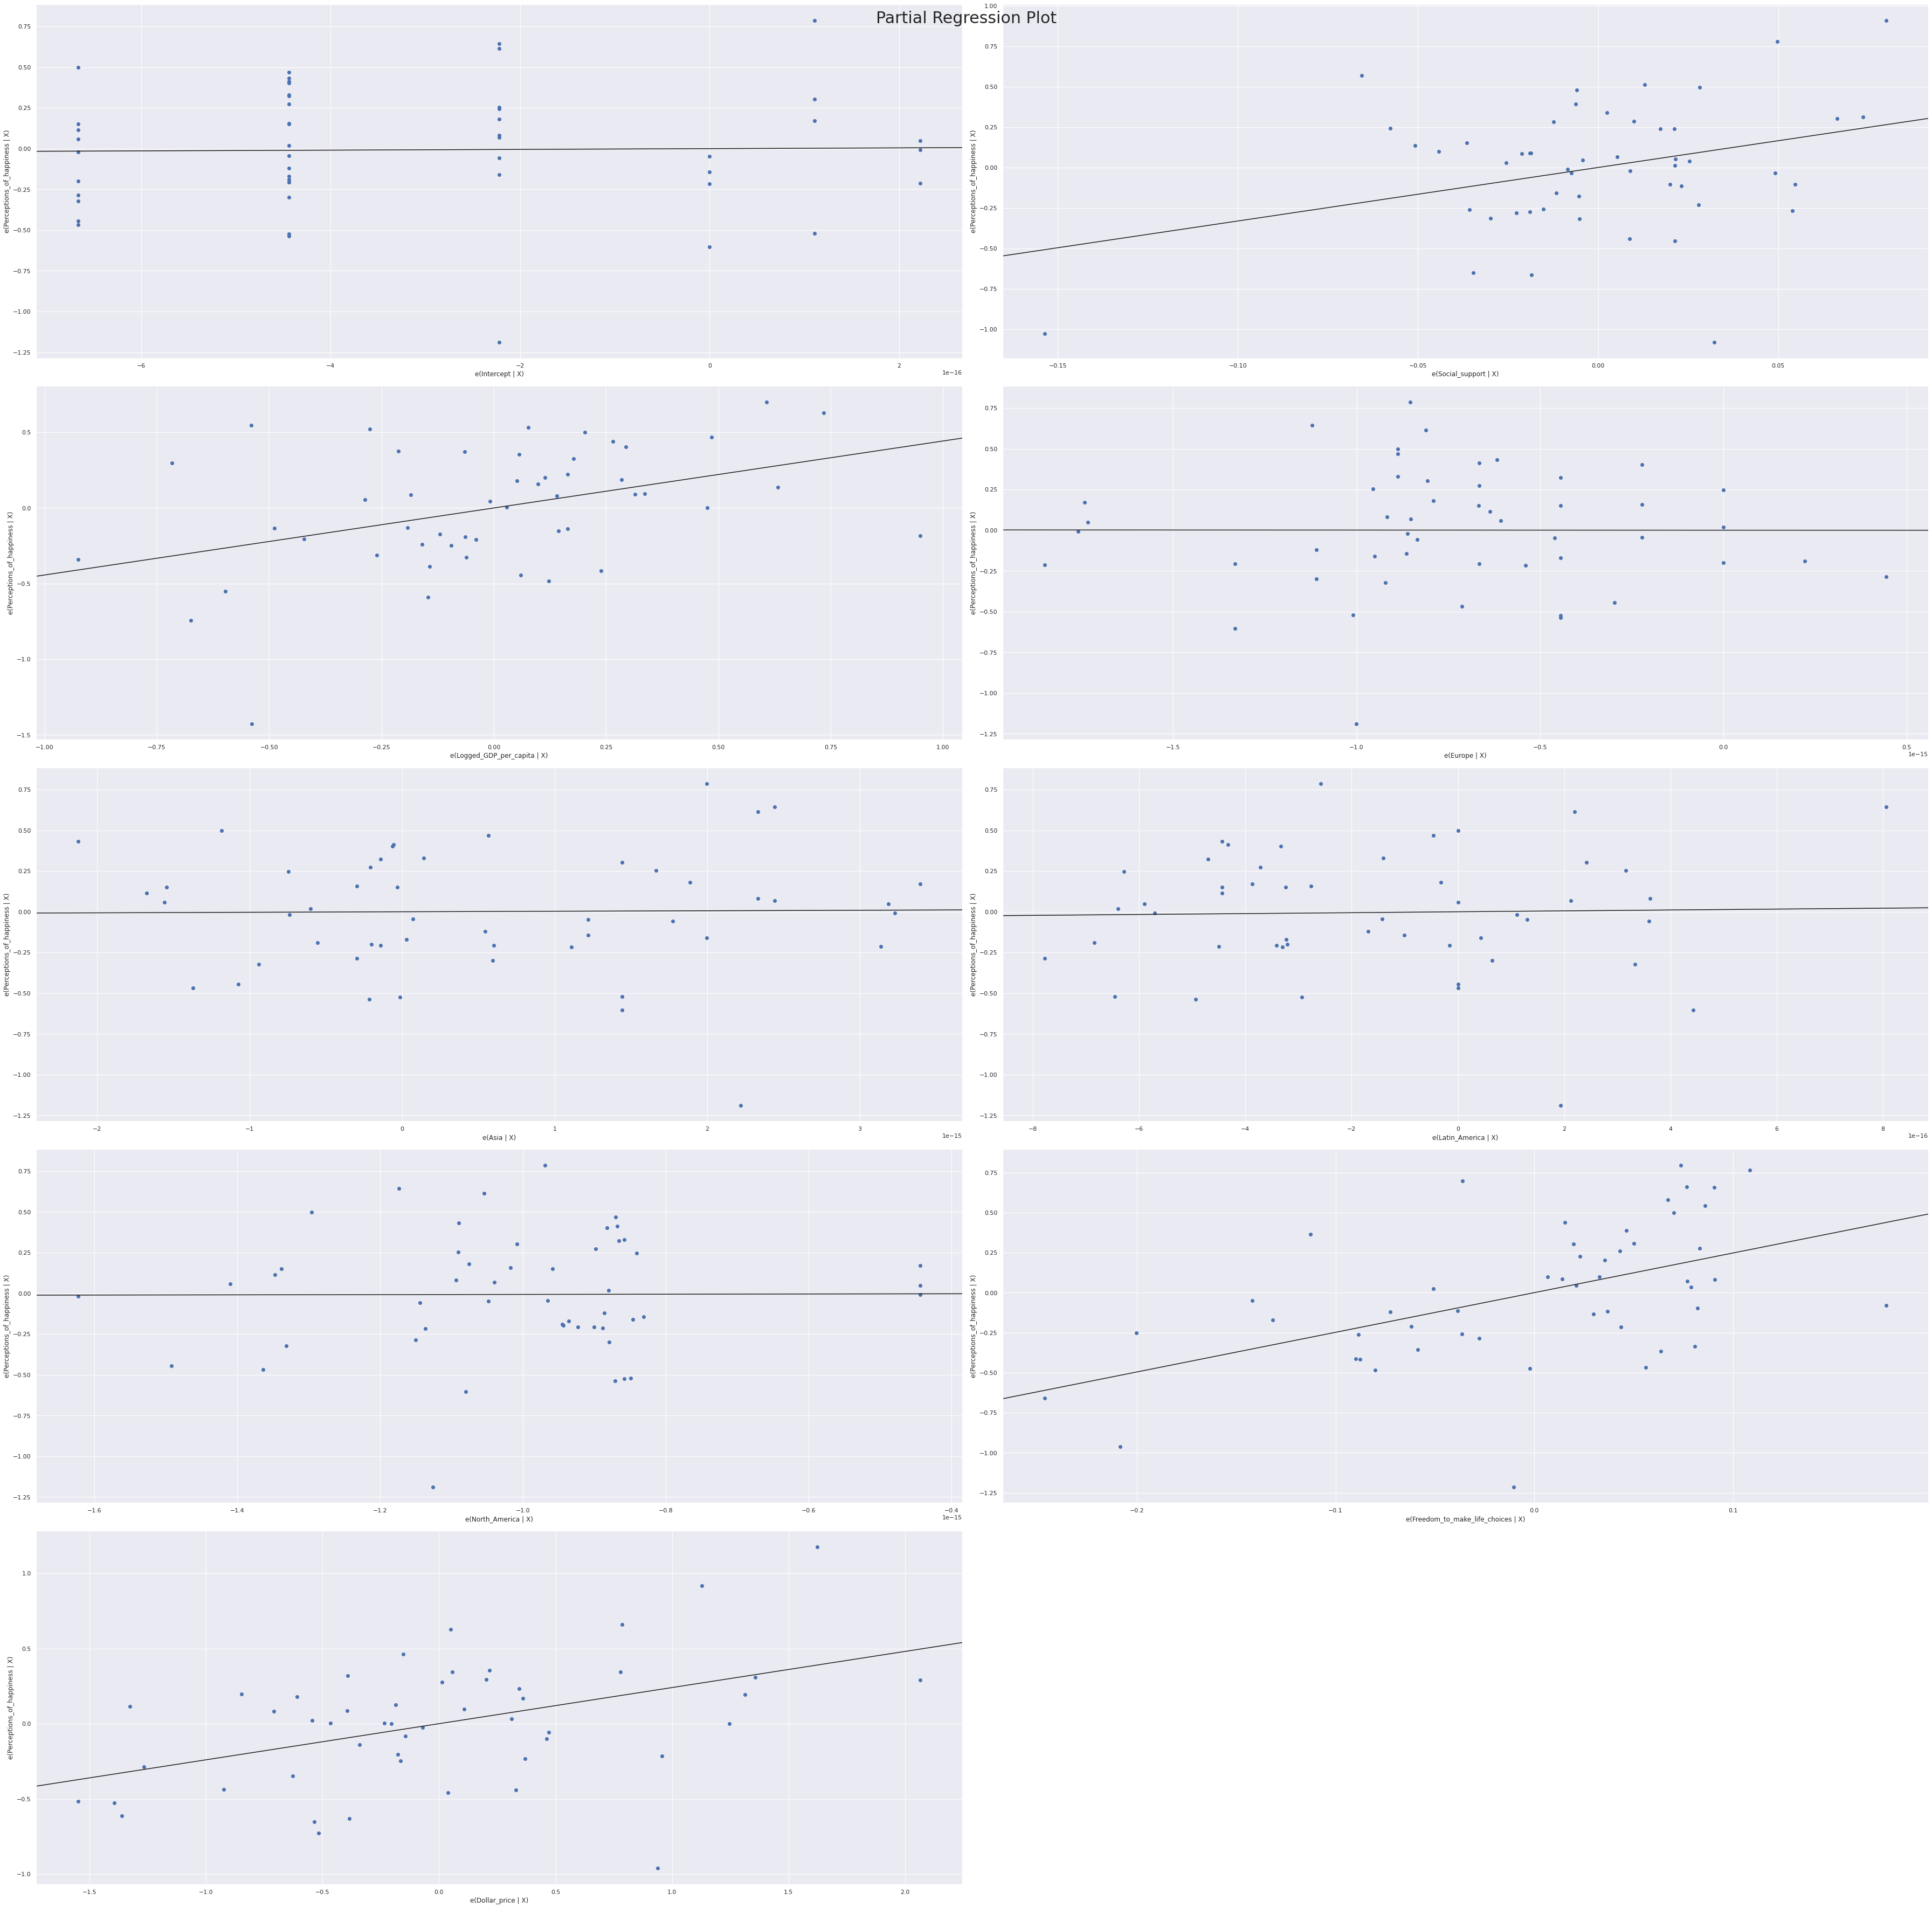

In [227]:
import statsmodels.api as sm
fig = sm.graphics.plot_partregress_grid(model4)

fig.tight_layout(pad=1.5)
#
